In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
np.set_printoptions(suppress=True)

In [2]:
ROCK,PAPER,SCISSORS = 0,1,2
NUM_ACTIONS = 3 #How many actions a player can take
strategy = np.array([0.0, 0.0, 0.0]) #define strategy of the player (to start)
oppStrategy = np.array([0.4, 0.3, 0.3]) #define strategy of the opponent (to start)

In [3]:
def value(p1, p2):
    if p1 == p2:
        return 0
    elif p1 == ROCK and p2 == SCISSORS:
        return 1
    elif p1 == SCISSORS and p2 == PAPER:
        return 1
    elif p1 == PAPER and p2 == ROCK:
        return 1
    else:
        return -1

In [4]:
def normalize(strategy):
    strategy = np.copy(strategy)
    normalizingSum = np.sum(strategy)
    if normalizingSum > 0:
        strategy /= normalizingSum
    else:
        strategy = np.ones(strategy.shape[0]) / strategy.shape[0]
    return strategy

In [5]:
def getStrategy(regretSum):
    return normalize(np.maximum(regretSum, 0))

In [6]:
def getAction(strategy):
    strategy = strategy / np.sum(strategy) #normalize
    return np.searchsorted(np.cumsum(strategy), random.random())

In [7]:
def train(iterations):
    regretSum = np.zeros(NUM_ACTIONS)
    strategySum = np.zeros(NUM_ACTIONS)
    actionUtility = np.zeros(NUM_ACTIONS)
    
    for i in range(iterations):
        strategy = getStrategy(regretSum)
        strategySum += strategy
        
        myAction = getAction(strategy)
        otherAction = getAction(oppStrategy)
        
        #for rock paper scissors
        actionUtility[otherAction] = 0
        actionUtility[(otherAction + 1) % NUM_ACTIONS] = 1
        actionUtility[(otherAction - 1) % NUM_ACTIONS] = -1
        
        regretSum += actionUtility - actionUtility[myAction]
    
    return strategySum

In [8]:
def getAverageStrategy(strategySum):
    return normalize(strategySum)

In [9]:
strategySum = train(100000)
getAverageStrategy(strategySum)

array([0.00000333, 0.99999333, 0.00000333])

In [16]:
def plotGames(strategy):
    vvv = []
    for j in range(200):
        vv = 0
        for i in range(100):
            myAction = getAction(strategy)
            otherAction = getAction(oppStrategy)
            vv += value(myAction, otherAction)
        vvv.append(vv)
    plt.plot(sorted(vvv))
    print(f"mean: {np.mean(vvv)}")

[0.33 0.33 0.33]
mean: -0.505


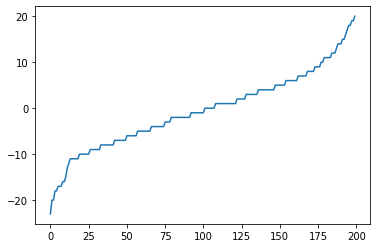

In [17]:
#here we are not exploiting at all...
strategy = np.array([0.33,0.33,0.33])
#strategy = np.array([0,1,0]) #only throw paper, should be the optimal strategy for an agent that favours rock
print(strategy)
plotGames(strategy)

[0.00000333 0.99999333 0.00000333]
mean: 9.815


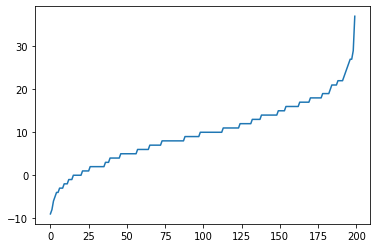

In [18]:
#plot the trained strategy
strategy = getAverageStrategy(strategySum)
print(strategy)
plotGames(strategy)